In [1]:
import numpy as np
import pandas as pd
import nltk
import os
import string
import io
from os import path
import wordcloud
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# coolvetica
font_path = d + "\coolvetica rg.ttf"

In [3]:
# Open the input file and read()
smart = open('smart.txt','r',encoding='utf-8').read()
pldt = open('pldt.txt','r',encoding='utf-8').read()
globe = open('globe.txt','r',encoding='utf-8').read()
sun = open('sun.txt','r',encoding='utf-8').read()

#sun = open('sun.txt','r',encoding='iso-8859-1').read()

#tokens


In [4]:
#tokenize files

from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()

smarttokens = tknzr.tokenize(smart)
pldttokens = tknzr.tokenize(pldt)
globetokens = tknzr.tokenize(globe)
suntokens = tknzr.tokenize(sun)

globetokens

['\ufeff',
 'gigil',
 'nyu',
 'si',
 'ako',
 'globe',
 'telecom',
 '...',
 'wlang',
 'signal',
 '...',
 'puta',
 '..',
 '😡',
 '😡',
 '😡',
 'https://t.co/0O5OPA5vhh',
 '@RepublikaTM',
 '0936-052-0633',
 '#OnTheGoals',
 '"',
 'Indonesia',
 'Among',
 "World's",
 'Most',
 'Underinsured',
 'Countries',
 '-',
 'Jakarta',
 'Globe',
 '"',
 'https://t.co/g4tLJxQrPL',
 '@RepublikaTM',
 '0936-063-9410',
 '#OnTheGoals',
 '@RepublikaTM',
 '0936-022-2233',
 '#OnTheGoals',
 '#nowplaying',
 'SWEET',
 'PAIN',
 'by',
 'globe',
 '@RepublikaTM',
 '0936-062-9633',
 '#OnTheGoals',
 '@RepublikaTM',
 '0936-009-2690',
 '#OnTheGoals',
 '@RepublikaTM',
 '0936-066-9697',
 '#OnTheGoals',
 '@RepublikaTM',
 '0936-096-2493',
 '#OnTheGoals',
 'RT',
 '@legitseller123',
 ':',
 'Selling',
 '2',
 'Months',
 'Spotify',
 'Premium',
 'Account',
 '=',
 'P90',
 'only',
 '-',
 'no',
 'ads',
 '-',
 'can',
 'download',
 'music',
 '-',
 'can',
 'play',
 'music',
 'offline',
 'MOP',
 ':',
 'Globe',
 'Load',
 'Pm',
 'Me',
 'For',
 'P

In [5]:
# get stopwords
stopwords = io.open(path.join(d, 'stopwords.txt')).read()
stopwords = nltk.word_tokenize(stopwords)
stopwords = set(stopwords)
#print(stopwords)

# NOT IN USE Remove punctuation and numbers from words
#tokens = [''.join(c for c in w if c.isalpha()) for w in words]
# Remove stopwords and blanks from words
#tokens = [w for w in tokens if w not in stopwords and w.isalpha()]
smarttokens = list(filter(lambda x: len(x) >= 2, smarttokens))
smarttokens = [w for w in smarttokens if w not in stopwords and w.isalpha()]

pldttokens = list(filter(lambda x: len(x) >= 2, pldttokens))
pldttokens = [w for w in pldttokens if w not in stopwords and w.isalpha()]

globetokens = list(filter(lambda x: len(x) >= 2, globetokens))
globetokens = [w for w in globetokens if w not in stopwords and w.isalpha()]

suntokens = list(filter(lambda x: len(x) >= 2, suntokens))
suntokens = [w for w in suntokens if w not in stopwords and w.isalpha()]



In [6]:
# Remove punctuation and numbers from words
#tokens = [''.join(c for c in w if c.isalpha()) for w in words]
# Remove stopwords and blanks from words
#tokens = [w for w in tokens if w not in stopwords and w.isalpha()]
smarttokens = list(filter(lambda x: len(x) >= 2, smarttokens))
smarttokens = [w for w in smarttokens if w not in stopwords and len(w) > 3]

pldttokens = list(filter(lambda x: len(x) >= 2, pldttokens))
pldttokens = [w for w in pldttokens if w not in stopwords and len(w) > 3]

globetokens = list(filter(lambda x: len(x) >= 2, globetokens))
globetokens = [w for w in globetokens if w not in stopwords and len(w) > 3]

suntokens = list(filter(lambda x: len(x) >= 2, suntokens))
suntokens = [w for w in suntokens if w not in stopwords and len(w) > 3]

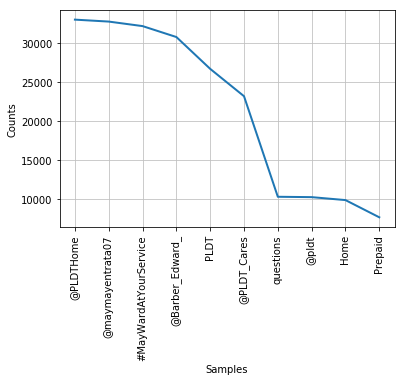

In [7]:
# Let's load the tokens into NLTK
smarttext = nltk.Text(smarttokens)
pldttext = nltk.Text(pldttokens)
globetext = nltk.Text(globetokens)
suntext = nltk.Text(suntokens)



# Calculate Frequency distributions
smartfreq = nltk.FreqDist(smarttext)
pldtfreq = nltk.FreqDist(pldttext)
globefreq = nltk.FreqDist(globetext)
sunfreq = nltk.FreqDist(suntext)

pldtfreq.most_common(10)
pldtfreq.plot(10)

# Print and plot most common words
#freq.most_common(20)
#freq.plot(10)

#wordfreqs




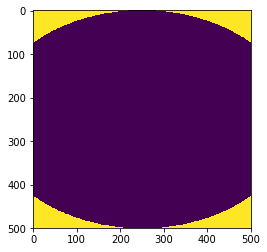

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]])

In [8]:
# Mask prep

x, y = np.ogrid[:400, :400]
shape = [400,200]

# parameters for ellipse (x,y) for centre of ellipse, (xdistortion, ydistortion)
ellipse = lambda x0, y0, r_x, r_y: lambda x, y: ((x - x0) / r_x)**2 + ((y - y0) / r_y)**2

def gen_ellipse(el, lower, upper, step):
    coords = np.arange(lower, upper, step)
    x, y = np.meshgrid(coords, coords)
    mask = el(x, y)
    mask = 255 * mask.astype(int)
    mask[np.where(mask > 1)] = 255
    return mask

el = ellipse(250, 250, 350, 250)

# You can change the size of the image, it will be a square from 2nd variable, default 0, to the 3rd variable, default 500
mask1 = gen_ellipse(el, 0, 500, 1)

mask = (x - 400) ** 2 + (y - 400) ** 2 > 300 ** 2
mask = 255 * mask.astype(int)

#plt.imshow(mask)
plt.imshow(mask1)
plt.show()
mask
#mask1

In [9]:
# Wordcloud settings
wc = wordcloud.WordCloud(font_path= font_path, background_color="white", max_words=30, stopwords=stopwords, colormap="winter", prefer_horizontal = 1, mask=mask1)

In [10]:
wc.generate_from_frequencies(smartfreq)
wc.to_file(path.join(d, "smart.png"))
wc.generate_from_frequencies(pldtfreq)
wc.to_file(path.join(d, "pldt.png"))
wc.generate_from_frequencies(globefreq)
wc.to_file(path.join(d, "globe.png"))
wc.generate_from_frequencies(sunfreq)
wc.to_file(path.join(d, "sun.png"))
